# **Etude de la classification  et prediction sur  IMC(BMI)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Realisation/m2/bmi.csv')

In [ ]:
df

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [ ]:
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [ ]:
df.tail()

,Gender,Height,Weight,Index
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5
499,Male,173,131,5


In [ ]:
df.isna().sum()

,0
Gender,0
Height,0
Weight,0
Index,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [ ]:
df.insert(3,'BMI',df['Weight']/((df['Height'])/100)**2)

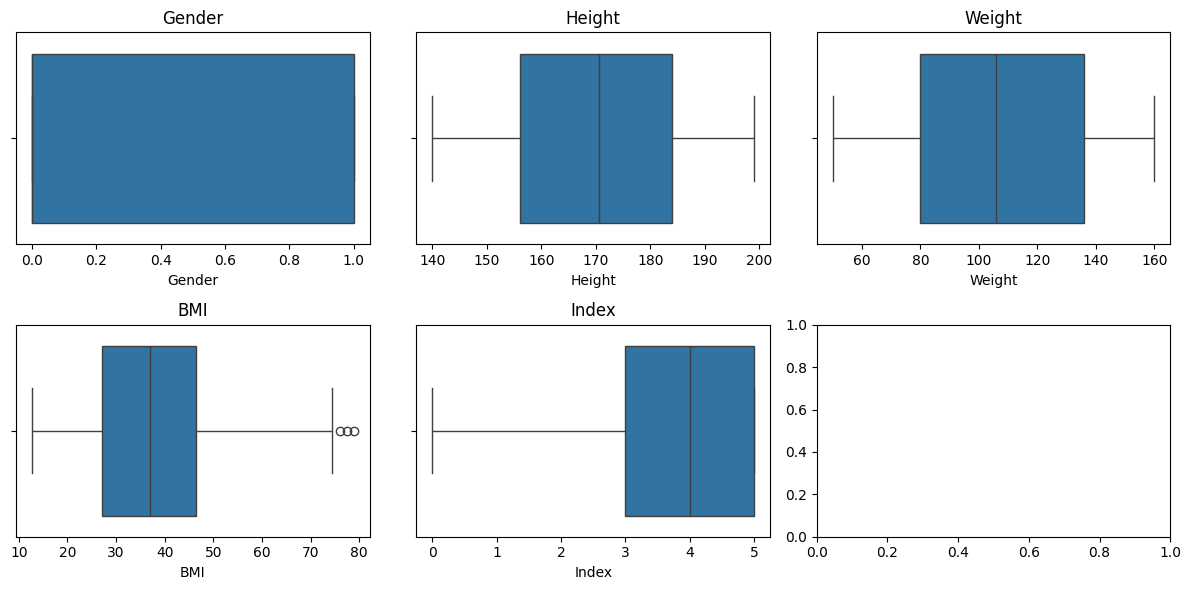

In [ ]:
fig,ax = plt.subplots(ncols = 3, nrows = 2, figsize = (12,6))
ax = ax.flatten()

for i, col in enumerate(df.columns):
    sns.boxplot(x=df[col], ax=ax[i])
    ax[i].set_title(col)

plt.tight_layout()

<Axes: >

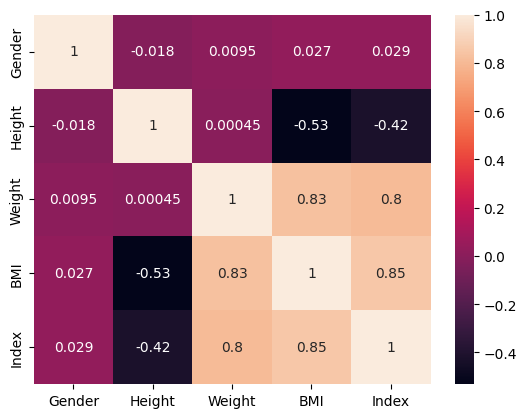

In [ ]:
sns.heatmap(df.corr(),annot = True)

In [ ]:

from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and you want to predict 'Index' (replace with your target variable)
X = df.drop('Index', axis=1)
y = df['Index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test

#Now you have X_train, X_test, y_train and y_test
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (400, 4)
X_test shape: (100, 4)
y_train shape: (400,)
y_test shape: (100,)


In [ ]:
!pip install autogluon

In [ ]:
# Combine X_train et y_train pour AutoGluon
train_data = X_train.copy()
train_data['Index'] = y_train  # Ajout de la colonne cible à l'ensemble d'entraînement

# Créez et entraînez le modèle AutoGluon
predictor = TabularPredictor(label='Index', eval_metric='accuracy').fit(train_data)


No path specified. Models will be saved in: "AutogluonModels/ag-20250124_024242"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       11.01 GB / 12.67 GB (86.9%)
Disk Space Avail:   75.63 GB / 107.72 GB (70.2%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions 

In [ ]:
# Préparer les données de test
test_data = X_test.copy()
test_data['Index'] = y_test  # Ajout de la colonne cible à l'ensemble de test

# Évaluer les performances du modèle
performance = predictor.evaluate(test_data)
print("Performance du modèle :", performance)


Performance du modèle : {'accuracy': 0.99, 'balanced_accuracy': 0.9944444444444445, 'mcc': 0.9861818652851796}


# prediction sur un ensemble de donnees

In [ ]:
# Exemple de nouvelles données pour la prédiction
new_df = pd.DataFrame({
    'Gender': [1, 0],  # Encodé : 1 = Male, 0 = Female
    'Height': [175, 160],  # Hauteur en cm
    'Weight': [70, 55],    # Poids en kg
    'BMI': [70 / ((175 / 100) ** 2), 55 / ((160 / 100) ** 2)]  # Calcul du BMI
})

print("New Donnees:")
print(new_df)


New Donnees:
   Gender  Height  Weight        BMI
0       1     175      70  22.857143
1       0     160      55  21.484375


Classe prédite

In [ ]:
# Faire une prédiction avec le modèle
predicted_classes = predictor.predict(new_df)

# Afficher les classes prédites
print("Classes prédites :", predicted_classes.values)


Classes prédites : [2 2]


Probabilite

In [ ]:
# Obtenir les probabilités pour chaque classe
predicted_probabilities = predictor.predict_proba(new_df)

# Afficher les probabilités
print("Probabilités prédites :")
print(predicted_probabilities)


Probabilités prédites :
      0     1         2     3         4    5
0  0.00  0.01  0.950000  0.04  0.000000  0.0
1  0.21  0.00  0.783333  0.00  0.006667  0.0
